輸入立委臉書粉專內容及選舉政見資料

In [21]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以台北市立委吳思瑤為例，建立發文文字斷詞表

In [22]:
wu = fb[fb.page_name == "吳思瑤"]
wu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
12516,211122988933967_2083766385002942,211122988933967,吳思瑤,政治人物,老朋友，新想像！\n\n歡迎文嘉大哥的光榮歸隊。,NaN,photo,https://www.facebook.com/211122988933967/posts/2083766385002942/,2019-01-13T12:14:00+0000,2019-01-13T20:14:00,...,卓榮泰,在這個江湖裡，被人津津樂道的，有那些失傳已久的武林絕學，更有曾經名震八方的名字，一說出來，就代表了一個時代。現在我要向大家宣布，新任民進黨秘書長的名字：羅文嘉。\n \n上工第五天，跑了很多補選場合，握著期待民進黨找回初衷、振衰起敝的每一雙手，我感受到更真實的使命感，在重振師門的這條路上，我們不能少掉任何一個老朋友。\n \n羅文嘉是大家耳熟能詳的老朋友，現在除了經營水牛出版社，也在桃園老家務農，偶爾也能在報章雜誌上看到他評論時事。\n \n為了貫徹「穩健改革、平穩進步」的參選承諾，我邀請他回到中央黨部，和我一起投入最深沈的改革，一起檢討並求取進步，最重要的原因，其實是他始終堅持民進黨的批判精神，也始終保有民進黨的初衷情懷。\n \n他也是我投身政治工作30年，許多重要黨政經歷上的好夥伴，既具備豐富的經驗，又曾經長期合作、共事，相信會是我能攻善守的好隊友。\n \n他放棄了田園故鄉的悠哉寫意，離開舒適圈走進悶熱的廚房。要從閒適的山林回到刀光劍影的戰場，我相信他是經過反覆思考，才願意站出來，再次與我們摯愛的民進黨共存共榮。\n \n老朋友：歡迎師兄弟歸位！你不只是挺大師兄，更是在這個最艱難的時刻，並肩承擔、相挺台灣！一起向前走吧！,479,0,0,0,0,0,21,4


In [23]:
wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')
wu.head(1)

<ipython-input-23-ce416ef0ba4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
<ipython-input-23-ce416ef0ba4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
12516,211122988933967_2083766385002942,211122988933967,吳思瑤,政治人物,老朋友，新想像！\n\n歡迎文嘉大哥的光榮歸隊。,NaN,photo,https://www.facebook.com/211122988933967/posts/2083766385002942/,2019-01-13T12:14:00+0000,2019-01-13T20:14:00,...,479,0,0,0,0,0,21,4,2019-01-13,2019-01


In [24]:
# 依照按讚數 低到高排序
wu = wu.sort_values(by=['like_count'])
# 用新的排序當作順序
wu.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [25]:
doc_names = range(len(wu)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 444)

In [26]:
wu = wu.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(wu['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [27]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

['［', '今年', '的', '毛孩', '版春聯', '，', '媽媽', '我', '這樣', '貼', '！', '］', '\n', '\n', '家裡', '的', '貓咪', '，', '喜歡', '跳上跳下', '，', '把', '東西', '撥下', '櫃子', '嗎', '？', '\n', '貼張', '「', '貓', '下去', '」', '春聯', '在', '櫃子', '上', '保平安', '。', '\n', '讓', '你家', '的貓', '，', '下去', ' ', '!', '\n', '\n', '家裡', '的', '狗狗', '，', '喜歡', '跑', '進', '廚房', '，', '偷', '刁', '或', '偷吃', '食物', '嗎', '？', '\n', '貼張', '「', '狗', 'away', '」', '春聯', '在', '流理', '臺', '避邪', '。', '\n', '讓', '你家', '的', '狗', '，', 'away', '!', '\n', '\n', ' ', 'P', '.', 'S', '.', ' ', '喜歡', '貓貓', '狗狗', '春聯', '的', '朋友', '今晚', '6', ':', '00', '石牌', '捷運', '站', '一二', '號', '出口', '見', '，', '限量', '500', '份發', '完為止', '！', '\n', '\n', '＃', '趨壞貓', '避壞', '狗', '保家裡', '貴重', '物品', '平安', '\n', '＃', '請', '各位', '貓咪遠', '離電視', '電腦', '花瓶', '玻璃杯', '\n', '＃', '請', '各位', '狗狗', '遠離', '主人', '的', '食物', '衣服', '及', '各種', '不能', '咬', '的', '東西']


In [28]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x000001D5EFA61D60>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [44]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
wu_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
wu_docs['jieba_results'] = wu_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪㊙️✨🔺😁😅😍⬇🙏✅🎈🔥📱👍👊🔸📍👉📢👩📌💼]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    wu_docs = wu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [45]:
wu_docs.iloc[434:,]  #從讚數最多的檢查

,jieba_results
434,下架 吳斯懷 上架 吳思瑤 你 我 一起 來 就 在 這個 禮拜天 民進黨 護國 保台 下架 吳斯懷 台北 之夜 登場 了 向 中國 更要 向 親中 的 國民黨 我們 就 必須 先向 吳斯懷們 在 台灣 民主 是 最好 的 方式 投票 就是 我們 最強 的 武器 展現 我們 共同 守護 台灣 的 意志 邀請 所有 關心 國家 安全 的 人 願意 挺身 捍衛 台灣 的 朋友 加入 全民下架 吳斯懷 的 行列 你 我 都 是 台灣隊 讓 我們 一起 下 架 吳斯懷 上架 吳思瑤 護國 保台 下架 吳斯懷 台北 之夜 時間 日 入場 地點 蔡英文 總統 連任 全國 競選總部 前 北平 東路 活動 連結 思瑤 思瑤 捐款 挺 思瑤
435,歲 末 最 後 一天 我們 通過 了 《 反滲透法 希望 能竭 盡所能 防堵 任何 影響 台灣 民主 的 行為 保護 台灣 更 多 繳出 這屆 國會 最後一張 漂亮 的 成績 單 心情 很 是 慰藉 傍晚 得知 競選 對手 惡質 捏造 民進黨 中 央 民調 以離 譜 扭曲 的 造假 內容 企圖 以 假亂 真 挽救 選情 當然 也 免不了 又 是 一番 政治 口 水 對 我 極盡 攻訐 抹黑 之能事 這樣 的 行為 已 涉及 違法 變造 黨中央 第一 時間 強烈 譴責 嚴正 澄清 很 是 感謝 迎 向 新年 的 前一刻 心情 歷經 不小 的 喜怒 擺盪 沒 問題 的 相信 自己 相信 正 能量 能克服 一切 相信 秉持 良善 可以 讓 我 安然 度過 所有 打擊 痛苦 會過 去 美麗會 留下 來 我 很慶幸 人生 無常 始終 擁有 一份 相信 的 正 能量 常保 熱忱 的 使命感 我 很 感恩 在 政治 領域 多年 還能 真誠面 對 自己 正向 面對 現實 的 考驗 向 所有 心疼 我 的 朋友 說 思瑤 一切 我會 微笑 堅定 前進 我會 優雅 從容勝出 滿滿 正 能量 無限 感恩 好久 沒 美照
436,這 四年 立院 推動 的 政策 很多 完成 的 工作 很多 哪一樣 最 困難 最 值得 紀錄 我 的 答案 無庸 置疑 就是 推動 《 政府 採購法 修法 逐步 完備 政府 採購 改革 《 採購法 年 頒布 施行 在 防弊 大 於 興利 的 舊 思維下 採取 最 保守 的 最低 標 便宜 是 王道 導致 台灣 從 硬體 的 公共 建設 到 軟體 的 公共 服務 遲遲 無法 進步 不僅 扼 殺 了 品質 更是 扼殺 了 專業 創意 與 美學 思瑤 努力完成 《 政府 採購法 的 修法 前後歷經 了 天 的 努力 採購 改革 不是 政治 議題 也 無關 藍綠 但 卻 比 年金改革 耗廢 更長 的 時間 也 比 轉型正義 討 黨產 的 改革 議題 更 遲 完成 為何 這項 改革 過程 如此 艱辛 因為 要 顛覆 傳統 守舊 凡事 只求 不敢 勇 於 任事 的 官僚 心態 甚至 連 國會 裡也 有 許多 防弊 第一 的 保守派 讓 革新 的 修法 過程 步履 蹣跚 感謝 許多 專業界 人士 與 思瑤 並肩 作戰 願意 耗費 時間 與 心力 不斷 的 溝通 對話 慢慢 匯集 共識 我們 讓 最低 標 成為 過去 式 最 有利 標 來 讓 專業 說 話 我們 導入 外部 專業 來 讓 每 一個 政府 標案 更為 合理 可行 也 透過 努力 讓 合理 工期 與 預算 能夠 逐步 精進 上路 也 嘗試 建立 更 健全 的 評審 制度 但 修法 只是 踏出 改革 的 第一步 完畢 整個 體制 翻轉 僵化 已久 的 採購 文化 還 需要 更長 時間 也許 還有 個 天 也 不 一定 但 至少 至少 總是 踏出 了 這樣 的 一步 讓 國家 可以 前進 而 不再 倒退 或 停滯 這樣 一個 攸關 台灣 整體 國家 進步 與 國際 接軌 的 重大 改革 完成 後 也 沒 有 獲得 太多 媒體 的 關注 一如 思瑤 投入 的 文化 議題 一樣 必須 耐得 住 寂寞 更 需要 理念 的 堅持 我 很 驕傲 天 的 堅持 天 的 奮力 不懈 思瑤 在 立院 主導 完成 了 採購 改革 未來 為 了 台灣 長 遠 發展 只要 是 對 的 事 不管 多漫長 多 寂寞 思瑤 也 一樣 會 堅持 到底 借 我 分鐘 讓 我們 一起 來 看 一下 吳思瑤 的 採購 改革 路
437,吳思瑤 努力 政見 看 得 見 參與 公辦 政見 會 是 向 公民 報告 是 身為 一個 候選人 應盡 的 義務 很 遺憾 的 是 上 週公辦 政見 會 國民黨 的 汪志冰 候選人 忙 著造勢 忙 著 選舉 缺席 發表政見 拒絕 讓 公民 檢驗 參選 理念 與 政見 而 另 一位 李姓 候選人 進行 政治 口水 與 不實 抹黑 他人 這樣 的 政見 發表 也 很 讓 人 啼笑皆非 讓 人聯 想到 韓國瑜 在 政見 會 上 的 表現 一樣 只有 批評 與 攻擊 提不出 政策 願景 思瑤 負責任 提出 項政見 與 政績 年來 思瑤 團隊 在 國會 與 地方 兢兢業業 不敢 鬆懈 交出 成績 真 誠 負責 提供 大家 來 檢驗 思瑤 向 公民 朋友 報告 的 各項 工作 內容 是 現在 進行式 更是 未來式 年 可以 做 很多 但 絕對 不夠 請 您 檢視 思瑤 的 問政表現 讓 正 能量 好 立委 留在 立院 持續 為 您 發聲 吳思瑤 政見 發表會 完整 影片 只有 分 的 政見 發表實 在 不夠 啊 分秒 必爭 只能 報告 項政見 政績 思瑤 留 立院 為 您 做 更 多
438,呱吉 跟 黃 郁芬 士林 北投 加 分 議員 要 跟 思瑤 一起 來 騎車 囉
439,激烈 的 初選 結束 可以 好好 來 探討 這場 初選 的 意義 民進黨 必須 感謝 賴清德 感念 他 不計 毀譽 的 堅持 促成 並 完成 了 這場 初選 不是 我個 人要 爭取 什麼 職位 而是 民進黨 需要 這場 初選 這是 賴清德 從 參選 之 初到 最終 一直 強調 的 不解 的 人 應當 在 選 後 再次 試著 思考 與 理解 他 何以 堅持 民進黨 總統初選 彰顯 了 對 內 及 對 外 的 雙重 意義 對外 我們 讓 社會 看見 民進黨 的 民主 本質 即使 是 現任 總統 也 必須 接受 黨內 的 挑戰 遵循 民主 的 程序 雖然 調整 初選 遊戲 規則 引發 爭議 但 也 因為 在議 決後新 程序 下 全力以赴 的 雙方 讓 社會 不 只 看 見 候選人 的 政策 論述 也 看 見 民進黨 執政 的 核心 價值 以及 捍衛 台灣 的 堅定 決心 對 內 因為 有 了 這場 初選 民進黨 人 走出 去年 九 合一 選舉 大敗 之後長 時間 的 低迷 藉由 兩位 候選人 的 競爭 重新 激發起 支持者 的 熱情 振奮 基層 試想 如果 少 了 這場 初選 蔡 總統 直接 爭取 連任 在 短 時間 我們 如何 誘發出 支持者 對下 一場 選舉 能夠 勝選 的 期待 和 信心 初選 過程 中 雙方 支持者 在 各 擁其主 心切 下 無可 避免 會產生 攻擊 和 火花 但 這種 雙方陣 營求勝 的 意志 不 也 同時 重塑 並強化 了 支持者 們 對 民進黨 的 認同 初選 競爭 讓 支持者 在 後 沒 有 成為 一盤 散沙 而是 形成 兩股 堅實 的 力量 我 也 相信 這兩股 同樣 構築 在 守護 台灣 與 民主 價值 之上 的 力量 都 會 在 勝負陣 痛過 去 之 後 重新 凝聚 再次 團結 初選 也 是 大選 的 操兵 演練 競爭 越 激烈 雙方陣 營求勝 意志 越強 組織 動員 與 政策 論述 迸發 的 能量 就 越 高 選舉 機器 的 預先 加溫 提早 測試 都 有利於 大選 的 上路 佈 局 蔡賴 陣營 所 代表 的 兩 股勢 力會 不會 成為 大選 的 團結 阻力 賴清德 選前 一再 宣示 倘落 敗則 全力支持 蔡 總統 在 今日 結果 揭曉 的 第一 時間 果然 說 到 做到 展現 出 絕佳 的 民主 風範 我 相信 賴 院長 未來 也將 全力 說服 支持者 放下 輸贏 爭取 未來 共同 的 勝利 小英 也 說 初選 是 自我 淬煉 競爭 讓 我們 更 進步 毫無疑 問地 蔡 總統 必將 發揮 國家 領導 人 的 高度 氣度 與 溫度 竭盡 一切 吸納 並擁 抱 黨內 沒有 支持 她 的 朋友 們 化對立 為 團結 真正 讓 一加 一大 於 二 一場 初選 讓 我們 看見 蔡英文 的 堅韌 與 實力 也 讓 我們 看見 賴清德 的 堅持 與 承擔 死水 成 了 活水 民進黨 有 了 重新 振作 的 氣力 民進黨 確實 需要 這場 初選 感謝 賴清德 的 堅持 讓 社會 真正 看見 了 這場 初選 的 價值 照片 出處 聯合 新聞網
440,今天下午 在 路邊 聽到 一個 熟悉 的 聲音 大喊 思瑤 姐姐 轉頭 一看 竟然 是剛 上任 的 副 秘書長 林飛帆 真的 非常 久 沒見 他 瘦 了 一圈 看起 來 更 成熟 了 呢 飛帆問 我 記不記 得 選前 倒數 兩天 他 為 我 特別 錄 製 了 一段 短片 催票 我 笑 回 怎麼 會 不 記得 呢 我永遠 記得 看到 影片 時 的 窩心 和 感動 那時 剛好 是 對 手 丁守中 罵 我 四十 歲 了 還敢 叫 自己 姐姐 的 當下 飛帆 的 影片 主題 就是 告訴 大家 思瑤 姐姐 為 什麼 是 思瑤 姐姐 下午 請 助理 找出 當時 的 那段 影片 三年 多 後 的 現在 看來 還是 感動 依舊 在

In [46]:
wu['jieba_results'] = wu_docs
wu_post = wu[['new_date','message','jieba_results','like_count']]
wu_post

,new_date,message,jieba_results,like_count
0,2019-01-25,［今年的毛孩版春聯，媽媽我這樣貼！］\n\n家裡的貓咪，喜歡跳上跳下，把東西撥下櫃子嗎？\n貼張「貓下去」春聯在櫃子上保平安。\n讓你家的貓，下去 !\n\n家裡的狗狗，喜歡跑進廚房，偷刁或偷吃食物嗎？\n貼張「狗away」春聯在流理臺避邪。\n讓你家的狗，away!\n\n P.S. 喜歡貓貓狗狗春聯的朋友今晚6:00石牌捷運站一二號出口見，限量500份發完為止！\n\n＃趨壞貓避壞狗保家裡貴重物品平安\n＃請各位貓咪遠離電視電腦花瓶玻璃杯\n＃請各位狗狗遠離主人的食物衣服及各種不能咬的東西,今年 的 毛孩 版春聯 媽媽 我 這樣 貼 家裡 的 貓咪 喜歡 跳上跳下 把 東西 撥下 櫃子 嗎 貼張 貓 下去 春聯 在 櫃子 上 保平安 讓 你家 的貓 下去 家裡 的 狗狗 喜歡 跑 進 廚房 偷 刁 或 偷吃 食物 嗎 貼張 狗 春聯 在 流理 臺 避邪 讓 你家 的 狗 喜歡 貓貓 狗狗 春聯 的 朋友 今晚 石牌 捷運 站 一二 號 出口 見 限量 份發 完為止 趨壞貓 避壞 狗 保家裡 貴重 物品 平安 請 各位 貓咪遠 離電視 電腦 花瓶 玻璃杯 請 各位 狗狗 遠離 主人 的 食物 衣服 及 各種 不能 咬 的 東西,92
1,2019-01-29,📢［別讓新南向成為新難向！］\n \n👩🏻‍💼觀看這次質詢影片前，你需要知道\n\n📌什麼是新南向政策？\n目的之一為藉此建立我國和東協、南亞及紐澳等國家共同開創區域的繁榮發展。\n\n📌為什麼科技部對新南向的推動如此重要？\n目前新南向政策具體方針之一是「五大旗艦產業」\n\n科技部在五大旗艦產業中的「產業創新合作」、「醫衛合作與產業鏈發展」及「區域農業發展」都扮演非常重要的角色。\n \n👩🏻‍💼這次質詢重點\n\n🔎科技部的新南向推動，有什麼問題？\n\n1. 不重視新南向\n總部會預算從106年開始，逐年增加，然而科技部編列新南向預算卻沒有增加的趨勢。\n\n2. 執行率不佳\n科技部共有22項新南向計畫，其中在107年預算執行率低於80%有7項。\n\n3. 無配合政府方針\n盤點三項與科技部有關之旗艦產業。\n\n「產業創新合作」108年新南向預算為100萬，但只佔科技部該項總預算的0.82%\n\n「醫衛合作與產業鏈發展」108年相關子計畫有兩項「醫材產品南向擴展行銷計畫(南科)」預算為2280萬僅占該項預算2.11%\n「台灣重要新興感染症」，預算為470萬，只占該項總預算的0.22%\n\n「區域農業發展」108年預算為220萬，更只佔該項總預算的0.1%,別 讓 新 南向 成為 新難 向 🏻 ‍ 觀看 這次 質詢 影片 前 你 需要 知道 什麼 是 新 南向 政策 目的 之一 為 藉此 建立 我國 和 東協 南亞及 紐澳 等 國家 共同 開創 區域 的 繁榮 發展 為 什麼 科技部 對 新 南向 的 推動 如此 重要 目前 新 南向 政策 具體 方針 之一 是 五大 旗艦 產業 科技部 在 五大 旗艦 產業 中 的 產業 創新 合作 醫衛 合作 與 產業 鏈 發展 及 區域 農業 發展 都 扮演 非常 重要 的 角色 🏻 ‍ 這次 質詢 重點 🔎 科技部 的 新 南向 推動 有什麼 問題 不 重視 新 南向 總部會 預算 從 年 開始 逐年 增加 然而 科技部 編列 新 南向 預算 卻 沒 有 增加 的 趨勢 執行率 不佳 科技部 共有 項新 南向 計畫 其中 在 年 預算 執行率 低 於 有 項 無 配合 政府 方針 盤點 三項 與 科技部 有關 之 旗艦 產業 產業 創新 合作 年 新 南向 預算為 萬 但 只 佔 科技部 該項 總 預算 的 醫衛 合作 與 產業 鏈 發展 年 相關 子 計畫 有 兩項 醫材產品 南向 擴展 行銷 計畫 南科 預算為 萬僅 占 該 項 預算 台灣 重要 新興 感染 症 預算為 萬 只 占 該 項 總 預算 的 區域 農業 發展 年 預算為 萬 更 只 佔 該 項 總 預算 的,105
2,2019-01-30,📢［國寶保衛戰！故宮準備好了嗎？］\n\n👩🏻‍💼觀看這次質詢影片之前，你需要知道\n\n📌故宮的文物為什麼重要？\n1.價值上的重要:日本媒體人野島剛致力研究故宮發展，他以藝術拍賣市場紀錄推估說，「故宮文物價值，大概可以買下台灣」\n\n2.歷史上的重要：故宮文物的歷史，就像一部台灣與中國的近代史\n\n3.國際上的重要：以目前國際排序，台北故宮博物院與法國羅浮宮、英國大英博物館、美國大都會博物館及北京故宮博物院齊名\n\n📌故宮在文物修復上有什麼責任？\n1.內部保存責任：文物的保存、修復、研究\n\n2.外部修復責任：修復人才的養成、經驗的傳承、觀念的普及\n \n👩🏻‍💼這次質詢重點\n\n🔎故宮文物保存，有什麼問題？\n1. 修復室類別太少\n2.登錄保存處員額太少\n3.平均文物修復時間太短\n4.待修文物太多\n5.工作繁重薪水太低\n\n這樣的修復人力荒，不改怎行？,國寶保衛戰 故宮 準備 好 了 嗎 🏻 ‍ 觀看 這次 質詢 影片 之前 你 需要 知道 故宮 的 文物 為 什麼 重要 價值 上 的 重要 日本 媒體 人 野島剛 致力 研究 故宮 發展 他 以 藝術 拍賣 市場 紀錄 推估 說 故宮 文物 價值 大概 可以 買下 台灣 歷史 上 的 重要 故宮 文物 的 歷史 就 像 一部 台灣 與 中國 的 近代史 國際 上 的 重要 以 目前 國際 排序 台北 故宮 博物院 與 法國羅 浮宮 英國 大英 博物 館 美國 大都 會 博物 館及 北京 故宮 博物院 齊名 故宮 在 文物 修 復 上 有 什麼 責任 內部 保存 責任 文物 的 保存 修 復 研究 外部 修 復 責任 修 復 人才 的 養成 經驗 的 傳承 觀念 的 普及 🏻 ‍ 這次 質詢 重點 🔎 故宮 文物 保存 有什麼 問題 修 復 室 類別 太少 登錄 保存 處員額 太少 平均 文物 修 復 時間 太短 待修 文物 太 多 工作 繁重 薪水 太低 這樣 的 修 復 人力 荒 不改 怎行 ？,111
3,2019-04-09,［地方創生=我故鄉我驕傲！］\n\n👩🏻‍💼看這次質詢影片前，你需要知道\n📌地方創生是什麼？\n地方創生政策是因應人口過度向城市集中造成鄉村空洞，為均衡臺灣城鄉差距，發展地方特色及產業，鼓勵青年返鄉就/創業的國家總戰略！\n\n📌教育部有什麼重要性？\n教育部門是最重要的人才庫，而地方創生的核心是人，解決地方問題和發展瓶頸，引導青年返鄉就業，需要各式各樣的人才支援！\n\n🔎本次的質詢重點\n1.教育部整合單位位階太低！教育部地方創生政策僅由技職司負責，政策分散缺乏整合。\n2.政策規劃不夠全面！教育部只推出強化「大學社會責任」及「營造休閒運動環境計畫」兩項，明顯不足。\n3.「大學社會責任」預算規模應提升！全面支持各大學進入地方創生優先推動區域，導引師生進入鄉鎮發掘地方特色，擴大產學合作。\n4.體育署應有地方創生政策軟體配套，不能淪為蚊子館！推動運動休閒設施硬體建設的100億預算應將各地方特色與體育運動結合，軟硬體充分結合。\n\n🌟成效\n教育部潘文忠部長同意：\n1.擴編大學社會責任USR計畫，強化高教人才投入地方創生。\n2.提高位階，教育部成立地方創生專責辦公室，由政務次長召集統籌。\n3.2個月內盤點、整合相關計畫，擴充教育部投入地方創生的政策能量。\n\n👾思瑤促成地方創生元年及內閣平台後，未來也會啟動一連串監督工作，強力督促各部會，落實人才培育與在地鏈結\n\n＃地方創生思瑤催生\n#思瑤的地方創生國會監督系列,地方 創生 我 故鄉 我 驕傲 🏻 ‍ 看 這次 質詢 影片 前 你 需要 知道 地方 創生 是 什麼 地方 創生 政策 是 因應 人口 過度 向 城市 集中 造成 鄉村 空洞 為 均衡 臺灣 城鄉 差距 發展 地方 特色 及 產業 鼓勵 青年 返鄉 就 創業 的 國家 總戰略 教育部 有什麼 重要性 教育部 門是 最 重要 的 人才 庫 而 地方 創生 的 核心 是 人 解決 地方 問題 和 發展 瓶 頸 引導 青年 返鄉 就業 需要 各式 各樣 的 人才 支援 🔎 本次 的 質詢 重點 教育部 整合 單位 位階太低 教育部 地方 創生 政策 僅由技 職司 負責 政策 分散 缺乏 整合 政策 規劃 不夠 全面 教育部 只 推出 強化 大學 社會責任 及 營造 休閒 運動 環境 計畫 兩項 明顯 不足 大學 社會責任 預算 規模 應 提升 全面 支持 各大學 進入 地方 創生 優先 推動 區域 導引 師生 進入 鄉鎮 發掘 地方 特色 擴大 產學合作 體育署 應有 地方 創生 政策 軟體 配套 不能 淪為 蚊子 館 推動 運動 休閒 設施 硬體 建設 的 億 預算 應將 各 地方 特色 與 體育 運動 結合 軟硬體 充分 結合 🌟 成效 教育部 潘文忠 部長 同意 擴編 大學 社會責任 計畫 強化 高教 人才 投入 地方 創生 提高 位階 教育部 成立 地方 創生 專責 辦公室 由政務次 長 召集 統籌 個 月 內 盤點 整合 相關 計畫 擴充 教育部 投入 地方 創生 的 政策 能量 👾 思瑤 促成 地方 創生 元年 及 內閣 平台 後 未來 也 會 啟動 一連串 監督 工作 強力 督促 各部 會 落實 人才 培育 與 在 地 鏈結 地方 創生 思瑤 催生 思瑤 的 地方 創生 國

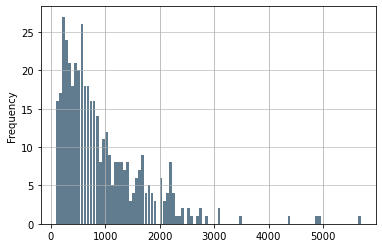

In [47]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = wu_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [48]:
temp = wu_post[(wu_post['like_count'] <= 1500) & (wu_post['like_count'] > 500)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
151,2019-08-20,108新課綱說明會《士林場》就在明天！！\n\n不論是有看沒有懂在煩惱的\n還是對新制上路還在緊張的\n\n思瑤姊姊邀集了教育部的官員們，親自來解惑囉！而且一次讓大家問到飽！\n\n還有還有，請大家告訴大家，只要來參加還會送一整套 #新課綱解析秘笈 ！\n\n👉 8/21（三） 19:00 ＠蘭雅國中\n\n本活動自由參加，歡迎爸爸媽媽大小朋友踴躍出席喔～\n\n＃你的煩惱就是我的煩惱\n＃教育的事就是我的事\n＃永遠的孩子最大黨,新課綱 說 明會 《 士林 場 就 在 明天 不論 是 有 看 沒 有 懂 在 煩惱 的 還是 對 新制 上路 還在 緊張 的 思瑤 姊姊 邀集 了 教育部 的 官員們 親自來 解惑 囉 而且 一次 讓 大家 問到 飽 還有 還有 請 大家 告訴 大家 只要 來 參加 還會 送 一整套 新課綱 解析 秘笈 三 蘭雅 國中 本 活動 自由 參加 歡迎 爸爸 媽媽 大小朋友 踴躍 出席 喔 你 的 煩惱 就是 我 的 煩惱 教育 的 事 就是 我 的 事 永遠 的 孩子 最大 黨,503
152,2019-05-21,和我的貓咪、狗狗相遇，真的改變了我的人生。\n當你與另一個生命陪伴彼此、相互需要，你會了解什麼是「責任」﹔當你與另一個生命一起成長經歷生、老、病、死，你會了解什麼是「無常」。\n這些毛孩不只是我重要的家人，更是我在認識生命時，最重要的老師。\n\n我深深相信與犬貓相處的經驗，一定也能帶給孩子們啟發，是最直接的生命教育，所以從我擔任立委的第一年，就努力促成教育部推動「校園友善犬貓試辦計畫」，而且幾年來爭取了更多補助，只要有學校願意加入認領養毛小孩的行列，每年補助由兩萬元提升到五萬元。\n\n今天上午台灣動物保護行政監督聯盟與我們幾位委員合辦了「全國各縣市高國中小動保社團暨校犬貓公布調查記者會」，動督盟的調查指出，全國擁有校犬貓的總學校數只有微幅上升，其中，資源最豐沛的台北市，更在6都中連續4年墊底。\n\n這真的非常可惜，校犬校貓數量有沒有增加，很大一個因素要取決於學校是否願意投入。這次12年國教新課綱中也融入了動保議題，我認為如果能同步擴大推動校園友善犬貓，讓在校園裡照顧犬貓成為生命教育的學習實境，除了能拯救許多流浪動物的生命，一定也能大大改變許多孩子的人生。\n\n#以領養取代購買\n#幫學生找生命教育老師幫毛小孩找家人\n#狗女兒ZaZa大鬧記者會,和 我 的 貓咪 狗狗 相遇 真的 改變 了 我 的 人生 當你 與 另 一個 生命 陪伴 彼此 相互 需要 你 會 了解 什麼 是 責任 ﹔ 當你 與 另 一個 生命 一起 成長 經歷生 老 病 死 你 會 了解 什麼 是 無常 這些 毛孩 不 只是 我 重要 的 家人 更是 我 在 認識 生命 時 最 重要 的 老師 我 深深 相信 與 犬貓 相處 的 經驗 一定 也 能 帶給 孩子 們 啟發 是 最 直接 的 生命 教育 所以 從 我 擔任 立委 的 第一年 就 努力 促成 教育部 推動 校園 友善 犬貓 試辦 計畫 而且 幾年 來 爭取 了 更 多 補助 只要 有學校 願意 加入 認領 養毛 小孩 的 行列 每年 補助 由 兩萬元 提升 到 五萬元 今天上午 台灣 動物 保護 行政 監督 聯盟 與 我們 幾位 委員 合辦 了 全國 各縣 市高 國中 小動 保社團 暨 校犬貓 公布 調查 記者會 動督盟 的 調查 指出 全國 擁有 校犬貓 的 總學 校數 只有 微幅 上升 其中 資源 最 豐沛 的 台北市 更 在 都 中連續 年 墊 底 這 真的 非常 可惜 校犬校 貓數量 有 沒 有 增加 很大 一個 因素 要 取決 於 學校 是否 願意 投入 這次 年國教 新課綱 中 也 融入 了 動 保議題 我 認為 如果 能 同步 擴大 推動 校園 友善 犬貓 讓 在校 園裡照 顧犬貓 成為 生命 教育 的 學習 實境 除了 能 拯救 許多 流浪 動物 的 生命 一定 也 能 大大 改變 許多 孩子 的 人生 以 領養 取代 購買 幫學生 找 生命 教育 老師 幫毛 小孩 找 家人 狗 女兒 大鬧 記者會,504
153,2019-10-17,思瑤LIVE又來囉！！\n\n稍後的5點我會在《POP大國民》，與主持人蔡詩萍來聊聊最近對於各種事情的看法，\n可以線上收看也可以透過廣播來收聽，歡迎大家來給思瑤加油應援喔 👐\n\n⏰ 時間：10月17日（四）1700-1800\n📻 廣播收聽：頻率FM91.7（大台北地區）\n👁 線上直播：http://yt1.piee.pw/LNVXV,思瑤 又 來 囉 稍 後 的 點我會 在 《 大國民 與 主持人 蔡詩萍 來 聊聊 最近 對 於 各種 事情 的 看法 可以 線上 收看 也 可以 透過 廣播 來 收 聽 歡迎 大家 來給 思瑤 加油 應援 喔 👐 時間 月 日 四 📻 廣播 收 聽 頻率 大台北 地區 👁 線上 直播,514
154,2019-07-02,今天抓住臨時會的空檔，找北投的大家聊聊，見了老朋友也認識新朋友！\n\n約了北投文化基金創辦人洪德仁醫師、還有北投社大謝國清校長，他們特別介紹幾位來自香港中文大學的同學們給我認識。\n與這些北投重要的地方人士們聊聊最近推動的北投文化工作及地方創生，也與這些學生們對談自己最近持續關注的香港反送中運動，並分享對台灣民主經驗的看法。從對談的話題到台港社會的比較，深切地體認到民主的可貴，先有民主才能談自由。\n\n下一站，例行的到關渡宮參拜，祈求地方平安順利，順道向跟廟方董事會們一起討論北投的藝術文化推廣合作；不得不說我很會挑時間，正好碰上來國軍53工兵群夥伴來拜訪！馬上拉著他們討論了北台灣的軍事國防安全工作，看大家認真的神情，姊姊覺得帥到爆啦！\n\n天母北投的鄉親都那麼熱情優秀，我這個選區立委真的走路都有風！！！\n\n#思瑤走跳中\n#為北投我battle,今天 抓住 臨時會 的 空檔 找 北投 的 大家 聊聊 見 了 老朋友 也 認識 新 朋友 約 了 北投 文化 基金 創辦 人 洪德仁 醫師 還有 北投 社大 謝國 清校 長 他們 特別 介紹 幾位 來 自 香港中文 大學 的 同學們 給我 認識 與 這些 北投 重要 的 地方 人士 們 聊聊 最近 推動 的 北投 文化 工作 及 地方 創生 也 與 這些 學生們 對 談 自己 最近 持續 關注 的 香港 反送 中運動 並 分享 對 台灣 民主 經驗 的 看法 從 對 談 的 話題 到 台港 社會 的 比 較 深切 地體 認到 民主 的 可貴 先有 民主 才能 談 自由 下 一站 例行 的 到 關渡宮 參拜 祈求 地方 平安 順利 順道 向 跟 廟方 董事 會們 一起 討論 北投 的 藝術 文化 推廣 合作 不得不 說 我 很會 挑時間 正好 碰上 來國 軍 工兵 群 夥伴 來 拜訪 馬 上拉著 他們 討論 了 北 台灣 的 軍事 國防 安全 工作 看 大家 認 真的 神情 姊姊 覺得帥 到 爆 啦 天母 北投 的 鄉親 都 那麼 熱情 優秀 我 這個 選區 立委 真的 走路 都 有 風 思瑤 走 跳 中 為 北投 我,525
155,2019-10-26,書中自有黃金屋\n黃金屋中讀樂樂\n\n《讀樂樂公園圖書館》第七座，從北投回到天母了。\n\n這次的《黃金屋》座落在天母新光三越後方的「天福綠地」，這是一座面積不大，但植栽、設施、景物等都相當豐富多元的三角形綠地。\n\n位於眾多樓房的中心，「天福綠地」就猶如一座都市裡的綠洲，不僅是周遭居民生活交流的重心，更是一處讓路人得以歇息的綠色角落。\n\n非常感謝知名的建築師夫婦 黃惠美／郭旭原 來聯手打造這座《黃金屋》，在公園最核心的量體～涼亭裡，運用黃色的支架，支撐堆疊架構出一座象徵著知識和思想積累的體系。\n\n建築師也想讓這座原本大家生活中陪伴多時的亭子，創造出一個既熟悉又陌生、既公共又私密的空間，讓閱讀在這裡可以發生、實現。\n\n明天將會舉行這座《黃金屋》的開幕典禮，\n快帶著你的非讀Book，一起讀樂樂吧！\n\n📚 讀樂樂公園圖書館計劃part7《黃金屋》📚\n\n‣ 建築師：黃惠美、郭旭原\n‣ 里長：天福里-江啟南\n‣ 開幕時間：10/27（日）14:00\n‣ 活動地點：天福綠地（天母新光三越後方/天母東路22巷內）,書中 自有 黃 金屋 黃 金屋 中讀 樂樂 《 讀樂樂 公園 圖書館 第 七座 從 北投 回到 天母 了 這次 的 《 黃 金屋 座落在 天母 新光 三越後方 的 天福 綠地 這是 一座 面積 不大 但植 栽 設施 景物 等 都 相當 豐富 多元 的 三角形 綠地 位 於 眾多樓 房 的 中心 天福 綠地 就 猶如 一座 都市 裡的 綠洲 不僅 是 周遭 居民 生活 交流 的 重心 更是 一處 讓 路 人 得以 歇息 的 綠色 角落 非常 感謝 知名 的 建築 師夫婦 黃 惠美 郭旭原 來 聯手 打造 這座 《 黃 金屋 在 公園 最 核心 的 量體 涼亭裡 運用 黃 色 的 支架 支撐 堆疊架 構出 一座 象徵 著知識 和 思想 積累 的 體系 建築師 也 想 讓 這座 原本 大家 生活 中 陪伴 多時 的 亭子 創造 出一個 既 熟悉 又 陌生 既 公共 又 私密 的 空間 讓 閱讀 在 這裡 可以 發生 實現 明天 將會 舉行 這座 《 黃 金屋 的 開幕 典禮 快帶 著 你 的 非讀 一起 讀樂樂 吧 📚 讀樂

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [49]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [50]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [51]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一下,一下下,一下子,一不小心,一些,一人,一代,一件,一份,...,黨團,黨派,黨部,鼓勵,鼓舞,鼻酸,齊心,齊發,齊聚,龍會
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.083070,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.091545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=6, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['努力', '創生', '政策', '能量', '我們', '地方', '設計', '北投', '台灣', '思瑤']
TOP 10 WORDS PER TOPIC #1
['教育', '前瞻', '學生', '一起', '一個', '計畫', '台灣', '大家', '思瑤', '宿舍']
TOP 10 WORDS PER TOPIC #2
['孩子', '一起', '紙風車', '我們', '姐姐', '天母', '北投', '藝術', '大家', '思瑤']
TOP 10 WORDS PER TOPIC #3
['我們', '大家', '讀樂樂', '圖書館', '選區', '閱讀', '台灣', '北投', '思瑤', '公園']
TOP 10 WORDS PER TOPIC #4
['今天', '孩子', '可以', '香港', '我們', '一起', '一個', '思瑤', '大家', '台灣']
TOP 10 WORDS PER TOPIC #5
['立委', '可以', '一起', '地方', '我們', '文化', '台灣', '大家', '思瑤', '北投']


In [53]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['圖書館', '大家', '文化', '讀樂樂', '閱讀', '北投', '思瑤', '公園', '我們', '台灣']
TOP 10 WORDS PER TOPIC #1
['明天', '時間', '林飛帆', '吳思瑤', '一起', '能量', '秘書長', '大家', '思瑤', '北投']
TOP 10 WORDS PER TOPIC #2
['姐姐', '士林', '大家', '台灣', '孩子', '天母', '能量', '宿舍', '北投', '思瑤']
TOP 10 WORDS PER TOPIC #3
['台灣', '我們', '天母', '一起', '大家', '可以', '宿舍', '思瑤', '公園', '北投']
TOP 10 WORDS PER TOPIC #4
['地方', '一起', '工程', '設計', '一個', '今天', '北投', '大家', '思瑤', '台灣']
TOP 10 WORDS PER TOPIC #5
['台灣', '知道', '實在', '今天', '天母', '北投', '房東', '狗狗', '大家', '思瑤']


In [54]:
#政見做斷詞

politics_wu = politics[politics.姓名 == "吳思瑤"].政見.to_string()
politics_wu = re.sub(re_punctuation, "", politics_wu)
politics_wu = re.sub(r'[0-9]','',politics_wu)
politics_wu = re.sub(r'[a-zA-Z]','',politics_wu)
politics_wu = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_wu)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_wu, cut_all = False)


In [55]:
# 比較、查看他政見
promise = politics[politics.姓名 == "吳思瑤"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['0    1、北投天母宜居社區 改善天母交通，拒絕大型開發，保存綠地與文化資產',
 '爭取復興崗國防大學校地釋出，中央地方協力規劃「社會 住宅+長照基地+智慧型社福研發中心+綠地公園+國防」五 合一生態社區',
 '加速推動士北科技園區，打造生技、資通訊產業科技城',
 '停建北纜，保存生態文史，結合溫泉觀光醫療，規劃北投 生活環境博物園區',
 '2、世代正義 推動年金改革，健全財政紀律',
 '推動社會住宅，減輕購屋負擔',
 '媒合青年創／就業資源，擴大輔導補助，改善勞動條件， 提升薪資水平',
 '推動稅制改革，縮小貧富差距，調漲基本工資，提高企業 納稅責任',
 '推動憲改，降低投票年齡至十八歲',
 '拒絕黑箱課綱，教育不受政治干預',
 '3、社會安全 強化食安監理，落實生產管理、查驗',
 '推動「托育、長照、就業」三合一政策',
 '托育服務社區／平價／優質化。推動留職育嬰、育嬰彈性 工時',
 '建立永續長照，推動社區型整合服務中心，結合在宅服 務、居家醫護、餐食服務、樂齡學堂，落實在地安老',
 '性別平等職場，提高婦女就業安全與薪資水平',
 '4、進步國家 開放政府，推廣柯P經驗，優化公民參與、資訊公開制度',
 '還權於民，修訂公投法、選罷法，降低公投門檻及罷免限 制',
 '環境正義，推動產業升級，發展綠能產業，提高環境汙染 稅，落實非核家園',
 '司法改革，落實民主／專業／透明化司法體系',
 '國會改革，拒絕密室協商，落實國會專業資深制',
 '追討黨產，政黨不當得利還財於民',
 '堅守台灣主體性，穩定兩岸和平發展，嚴格監督各項兩岸 合作協議。']

In [56]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_wu, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [57]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=7, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['環境正義', '政黨', '進步', '科技', '平價', '財政紀律', '三合一', '結合', '薪資', '保存']
TOP 10 WORDS PER TOPIC #1
['智慧型社福研發中心', '北纜', '資源', '穩定', '士北科技園區', '宅服', '改善', '社會', '社區', '推動']
TOP 10 WORDS PER TOPIC #2
['工時', '產業升級', '長照', '公投法', '建立', '修訂', '資訊公開制度', '觀光', '兩岸', '托育']
TOP 10 WORDS PER TOPIC #3
['文史', '開發', '育嬰', '補助', '基本工資', '教育', '規劃', '服務', '水平', '拒絕']
TOP 10 WORDS PER TOPIC #4
['資產', '醫療', '查驗', '樂齡學堂', '民主', '憲改', '門檻', '發展', '就業', '國防']
TOP 10 WORDS PER TOPIC #5
['資通訊', '政府', '社區型整合服務中心', '堅守', '政治', '還財於民', '打造', '北投', '降低', '提高']
TOP 10 WORDS PER TOPIC #6
['輔導', '得利', '公投', '爭取', '興崗', '地釋', '生活環境博物園區', '開放', '天母', '落實']


In [58]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

環境正義, 政黨, 進步, 科技, 平價, 財政紀律, 三合一, 結合, 薪資, 保存, 智慧型社福研發中心, 北纜, 資源, 穩定, 士北科技園區, 宅服, 改善, 社會, 社區, 推動, 工時, 產業升級, 長照, 公投法, 建立, 修訂, 資訊公開制度, 觀光, 兩岸, 托育, 文史, 開發, 育嬰, 補助, 基本工資, 教育, 規劃, 服務, 水平, 拒絕, 資產, 醫療, 查驗, 樂齡學堂, 民主, 憲改, 門檻, 發展, 就業, 國防, 資通訊, 政府, 社區型整合服務中心, 堅守, 政治, 還財於民, 打造, 北投, 降低, 提高, 輔導, 得利, 公投, 爭取, 興崗, 地釋, 生活環境博物園區, 開放, 天母, 落實, 

In [59]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'環境正義': 1,
         '政黨': 1,
         '進步': 1,
         '科技': 1,
         '平價': 1,
         '財政紀律': 1,
         '三合一': 1,
         '結合': 1,
         '薪資': 1,
         '保存': 1,
         '智慧型社福研發中心': 1,
         '北纜': 1,
         '資源': 1,
         '穩定': 1,
         '士北科技園區': 1,
         '宅服': 1,
         '改善': 1,
         '社會': 1,
         '社區': 1,
         '推動': 1,
         '工時': 1,
         '產業升級': 1,
         '長照': 1,
         '公投法': 1,
         '建立': 1,
         '修訂': 1,
         '資訊公開制度': 1,
         '觀光': 1,
         '兩岸': 1,
         '托育': 1,
         '文史': 1,
         '開發': 1,
         '育嬰': 1,
         '補助': 1,
         '基本工資': 1,
         '教育': 2,
         '規劃': 1,
         '服務': 1,
         '水平': 1,
         '拒絕': 1,
         '資產': 1,
         '醫療': 1,
         '查驗': 1,
         '樂齡學堂': 1,
         '民主': 1,
         '憲改': 1,
         '門檻': 1,
         '發展': 1,
         '就業': 1,
         '國防': 1,
         '資通訊': 1,
         '政府': 1,
         '社區型整合服務中心': 1,
         '堅

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [60]:
top_10_message = tfidf_view.sort_values(by = ['天母'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['天母'], ascending = False).head(10)

,一一,一下,一下下,一下子,一不小心,一些,一人,一代,一件,一份,...,黨團,黨派,黨部,鼓勵,鼓舞,鼻酸,齊心,齊發,齊聚,龍會
190,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.06836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.103877,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[190,]).sort_values(by = 190, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,190
天母,0.474446
三玉宮,0.272902
辣台妹,0.228805
小英總統,0.200754
總統,0.182627
...,...
尋找,0.000000
尊重,0.000000
尊敬,0.000000
專頁,0.000000


In [63]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[199,]).sort_values(by = 199, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,199
天母,0.441427
三玉宮,0.341801
小英,0.229257
總統,0.228735
新書,0.177972
...,...
導覽,0.000000
導致,0.000000
導彈,0.000000
導入,0.000000


In [64]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

188     主席
189     委員
190     天母
191     傳說
192    林飛帆
193    建築師
194    李彥秀
195     設計
196     花媽
197    不定期
198    秘書長
199     天母
200     六次
201     藝術
202     能量
203     香港
204     中止
205     能量
206     月亮
207     花媽
Name: term, dtype: object

In [65]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="花媽"]

,一一,一下,一下下,一下子,一不小心,一些,一人,一代,一件,一份,...,黨派,黨部,鼓勵,鼓舞,鼻酸,齊心,齊發,齊聚,龍會,term
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.060969,0.068805,0.0,0.0,0.0,0.0,0.0,花媽
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066441,0.000000,0.0,0.0,0.0,0.0,0.0,花媽


In [66]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[196,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                         2019-11-26
message                                                                                     謝謝花媽，送給思瑤滿滿的正能量！\n\n今天花媽特別到訪北投慈后宮和慈生宮參香祈福，給思瑤加油。\n原本一早還是涼涼的氣候，花媽一到，陽光都暖了起來。\n\n花媽一直關心著思瑤的選舉，給我鼓勵：「愈多的委屈與困難，都是考驗我們服務土地的意志是不是夠堅定。只要時時提醒自己從政的初衷，任何艱難都可以克服。」\n\n關關難過關關過！\n花媽的鼓舞，真的給了思瑤好大的正能量。\n\n我也特別抓緊了機會，向花媽介紹思瑤嘔心瀝血的新書《在地 real local 北投天母》，和我跑選舉的秘密武器Gogobar，花媽很喜歡，直說「思瑤，政治可以這樣創新，很好！」\n\n北投的鄉親也感染了花媽堅韌的正能量，我們有信心，一定能在艱難中勝出，共享努力過後的甜美果實。\n\n＃正能量好立委\n＃正能量暖花媽\n＃正能量大聯盟\n＃2020一定要贏
jieba_results     謝謝 花媽 送給 思瑤 滿滿 的 正 能量 今天 花媽 特別 到 訪 北投 慈后 宮 和 慈生宮 參香 祈福 給 思瑤 加油

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [68]:
message_newtfidf[message_newtfidf['term']=="公園"]

,一一,一下,一下下,一下子,一不小心,一些,一人,一代,一件,一份,...,黨派,黨部,鼓勵,鼓舞,鼻酸,齊心,齊發,齊聚,龍會,term
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,公園
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.051678,0.0,0.0,0.0,0.0,0.0,0.0,公園


In [69]:
temp.iloc[11,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           2019-08-27
message          ｜圖書館 Ｘ 公園｜ \n\n我們在找一本書～＃非讀BOOK\n  \n\n閱讀，不僅能拓展人們的視野，更是激發人們想像力的鑰匙。\n\n 讀樂樂公園圖書館計畫將圖書館帶進了社區的公園，讓閱讀可以隨時隨地、自由自在的發生！\n\n公園不只是孩子玩耍嬉戲、長輩休閒運動、鄰居閒話家常的場所，\n更是個可以融合閱讀、分享知識的社區生活中心。\n\n在多位建築設計師的努力下，\n大家期待已久的讀樂樂公園圖書

In [70]:
temp.iloc[86,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 2019-10-07
message                                                                                                                                                                                把設計帶進社區\n把閱讀帶入生活\n我們真的慢慢讓它發生了！\n\n 《讀樂樂公園圖書館計

In [71]:
message_newtfidf[message_newtfidf['term']=="中國"]

,一一,一下,一下下,一下子,一不小心,一些,一人,一代,一件,一份,...,黨派,黨部,鼓勵,鼓舞,鼻酸,齊心,齊發,齊聚,龍會,term
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,中國


In [72]:
temp.iloc[177,]

new_date                                                                                                                                                                       2019-02-21
message             近來，世界各國已經紛紛警覺到中國越來越強的侵略性，\n很慶幸也很驕傲，小英總統每每都能即時呼應國際局勢的變化，\n讓世界看到台灣面對中國的威脅時，不卑不亢的態度！\n\n然後，\n\n阿母，我上CNN啦！！！！（雖然只有3秒...）\n\n#TaiwanPresident\n#不得不說CNN記者真會挑畫面\n#果然是國際專業媒體
jieba_results     近來 世界 各國 已經 紛紛 警覺 到 中國 越來 越強 的 侵略性 很慶幸 也 很 驕傲 小英總統 每每 都 能 即 時 呼應 國際局勢 的 變化 讓 世界 看到 台灣 面對 中國 的 威脅 時 不卑不亢 的 態度 然 後 阿母 我 上  啦 雖然 只有  秒     不得不 說  記者 真會 挑畫面  果然 是 國際 專業 媒體
like_count                                                                                                                                                                           1254
Name: 328, dtype: object

In [73]:
message_newtfidf[message_newtfidf['term']=="香港"]

,一一,一下,一下下,一下子,一不小心,一些,一人,一代,一件,一份,...,黨派,黨部,鼓勵,鼓舞,鼻酸,齊心,齊發,齊聚,龍會,term
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,香港
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,香港
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.104534,0.0,0.0,香港
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,香港


In [74]:
temp.iloc[7,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               2019-06-17
message                                                                                                                                                                      台灣國會，挺香港，反送中！\n\n立法院各黨團於108年6月17日召開第7會期第1次臨時會之際，針對香港人民集會遊行要求香港政府撤回將犯罪嫌疑人引渡到中國大陸的「2019年逃犯及刑事事宜香法律協助法例(修訂)條例草案」(以下簡稱「逃犯條例」)，經協商共同聲明如下：\n\n一、 香港政府以武力處理群眾運動的方式，本院全體同仁提出譴責與抗議

In [75]:
temp.iloc[149,]

new_date                                                                                                                                                                                                                                                                                                                                                                                   2019-09-29
message                                                                                  今天在挺香港反極權的遊行現場，心情是沈重的。\n因為剛聽聞香港歌手何韻詩遭統促黨人士潑漆，\n在自由民主的台灣發生這樣的事，覺得憤怒，\n也對這樣一位長期支持民主人權、勇敢無畏的香港人感到抱歉。\n\n看見許許多多老老少少的台灣人一起不畏風雨走上街頭，\n我們一起喊口號，一起互道加油，\n心情慢慢調整過來，溫暖也感動。\n\n然後，天空出現了好大好美的彩虹，\n真的好久沒有看見這樣色彩鮮明的彩虹了。\n眼角不禁濕了。\n\n就算風雨再大、遇到再多的阻撓，\n也不會阻擋我們追求自由與民主的決心！\n雨後會有彩虹的🌈\n香港加油！台灣加油！\n\n#挺香港反極權\n#929台港大遊行——撐港反極權
jieba_results     今天 在 挺 香港 反極權 的 遊行 現場 心情 是 沈重 的  因為 剛聽聞 香港 歌手 何韻詩 遭統 促黨 人士 潑漆 在 自由民主 的 台灣 發生 這樣 的 事 覺得 憤怒 也 對 這樣 一位 長期 支持 民主 人權 勇敢 無畏 的 香港 人 感到 抱歉  看見 許許 多多 老老少少 的 台灣 人 一起 不畏 風雨 走上 街頭 我們 一起 喊口號 一起 互 道 加油 心情 慢慢 調整 過來 溫暖

In [76]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['圖書館', '大家', '文化', '讀樂樂', '閱讀', '北投', '思瑤', '公園', '我們', '台灣']
TOP 10 WORDS PER TOPIC #1
['明天', '時間', '林飛帆', '吳思瑤', '一起', '能量', '秘書長', '大家', '思瑤', '北投']
TOP 10 WORDS PER TOPIC #2
['姐姐', '士林', '大家', '台灣', '孩子', '天母', '能量', '宿舍', '北投', '思瑤']
TOP 10 WORDS PER TOPIC #3
['台灣', '我們', '天母', '一起', '大家', '可以', '宿舍', '思瑤', '公園', '北投']
TOP 10 WORDS PER TOPIC #4
['地方', '一起', '工程', '設計', '一個', '今天', '北投', '大家', '思瑤', '台灣']
TOP 10 WORDS PER TOPIC #5
['台灣', '知道', '實在', '今天', '天母', '北投', '房東', '狗狗', '大家', '思瑤']


In [77]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
151,2019-08-20,新課綱 說 明會 《 士林 場 就 在 明天 不論 是 有 看 沒 有 懂 在 煩惱 的 還是 對 新制 上路 還在 緊張 的 思瑤 姊姊 邀集 了 教育部 的 官員們 親自來 解惑 囉 而且 一次 讓 大家 問到 飽 還有 還有 請 大家 告訴 大家 只要 來 參加 還會 送 一整套 新課綱 解析 秘笈 三 蘭雅 國中 本 活動 自由 參加 歡迎 爸爸 媽媽 大小朋友 踴躍 出席 喔 你 的 煩惱 就是 我 的 煩惱 教育 的 事 就是 我 的 事 永遠 的 孩子 最大 黨
152,2019-05-21,和 我 的 貓咪 狗狗 相遇 真的 改變 了 我 的 人生 當你 與 另 一個 生命 陪伴 彼此 相互 需要 你 會 了解 什麼 是 責任 ﹔ 當你 與 另 一個 生命 一起 成長 經歷生 老 病 死 你 會 了解 什麼 是 無常 這些 毛孩 不 只是 我 重要 的 家人 更是 我 在 認識 生命 時 最 重要 的 老師 我 深深 相信 與 犬貓 相處 的 經驗 一定 也 能 帶給 孩子 們 啟發 是 最 直接 的 生命 教育 所以 從 我 擔任 立委 的 第一年 就 努力 促成 教育部 推動 校園 友善 犬貓 試辦 計畫 而且 幾年 來 爭取 了 更 多 補助 只要 有學校 願意 加入 認領 養毛 小孩 的 行列 每年 補助 由 兩萬元 提升 到 五萬元 今天上午 台灣 動物 保護 行政 監督 聯盟 與 我們 幾位 委員 合辦 了 全國 各縣 市高 國中 小動 保社團 暨 校犬貓 公布 調查 記者會 動督盟 的 調查 指出 全國 擁有 校犬貓 的 總學 校數 只有 微幅 上升 其中 資源 最 豐沛 的 台北市 更 在 都 中連續 年 墊 底 這 真的 非常 可惜 校犬校 貓數量 有 沒 有 增加 很大 一個 因素 要 取決 於 學校 是否 願意 投入 這次 年國教 新課綱 中 也 融入 了 動 保議題 我 認為 如果 能 同步 擴大 推動 校園 友善 犬貓 讓 在校 園裡照 顧犬貓 成為 生命 教育 的 學習 實境 除了 能 拯救 許多 流浪 動物 的 生命 一定 也 能 大大 改變 許多 孩子 的 人生 以 領養 取代 購買 幫學生 找 生命 教育 老師 幫毛 小孩 找 家人 狗 女兒 大鬧 記者會
153,2019-10-17,思瑤 又 來 囉 稍 後 的 點我會 在 《 大國民 與 主持人 蔡詩萍 來 聊聊 最近 對 於 各種 事情 的 看法 可以 線上 收看 也 可以 透過 廣播 來 收 聽 歡迎 大家 來給 思瑤 加油 應援 喔 👐 時間 月 日 四 📻 廣播 收 聽 頻率 大台北 地區 👁 線上 直播
154,2019-07-02,今天 抓住 臨時會 的 空檔 找 北投 的 大家 聊聊 見 了 老朋友 也 認識 新 朋友 約 了 北投 文化 基金 創辦 人 洪德仁 醫師 還有 北投 社大 謝國 清校 長 他們 特別 介紹 幾位 來 自 香港中文 大學 的 同學們 給我 認識 與 這些 北投 重要 的 地方 人士 們 聊聊 最近 推動 的 北投 文化 工作 及 地方 創生 也 與 這些 學生們 對 談 自己 最近 持續 關注 的 香港 反送 中運動 並 分享 對 台灣 民主 經驗 的 看法 從 對 談 的 話題 到 台港 社會 的 比 較 深切 地體 認到 民主 的 可貴 先有 民主 才能 談 自由 下 一站 例行 的 到 關渡宮 參拜 祈求 地方 平安 順利 順道 向 跟 廟方 董事 會們 一起 討論 北投 的 藝術 文化 推廣 合作 不得不 說 我 很會 挑時間 正好 碰上 來國 軍 工兵 群 夥伴 來 拜訪 馬 上拉著 他們 討論 了 北 台灣 的 軍事 國防 安全 工作 看 大家 認 真的 神情 姊姊 覺得帥 到 爆 啦 天母 北投 的 鄉親 都 那麼 熱情 優秀 我 這個 選區 立委 真的 走路 都 有 風 思瑤 走 跳 中 為 北投 我
155,2019-10-26,書中 自有 黃 金屋 黃 金屋 中讀 樂樂 《 讀樂樂 公園 圖書館 第 七座 從 北投 回到 天母 了 這次 的 《 黃 金屋 座落在 天母 新光 三越後方 的 天福 綠地 這是 一座 面積 不大 但植 栽 設施 景物 等 都 相當 豐富 多元 的 三角形 綠地 位 於 眾多樓 房 的 中心 天福 綠地 就 猶如 一座 都市 裡的 綠洲 不僅 是 周遭 居民 生活 交流 的 重心 更是 一處 讓 路 人 得以 歇息 的 綠色 角落 非常 感謝 知名 的 建築 師夫婦 黃 惠美 郭旭原 來 聯手 打造 這座 《 黃 金屋 在 公園 最 核心 的 量體 涼亭裡 運用 黃 色 的 支架 支撐 堆疊架 構出 一座 象徵 著知識 和 思想 積累 的 體系 建築師 也 想 讓 這座 原本 大家 生活 中 陪伴 多時 的 亭子 創造 出一個 既 熟悉 又 陌生 既 公共 又 私密 的 空間 讓 閱讀 在 這裡 可以 發生 實現 明天 將會 舉行 這座 《 黃 金屋 的 開幕 典禮 快帶 著 你 的 非讀 一起 讀樂樂 吧 📚 讀樂樂 公園 圖書館 計劃 《 黃 金屋 📚 ‣ 建築師 黃 惠美 郭旭原 ‣ 里長 天福 里 江啟 南 ‣ 開幕 時間 日 ‣ 活動 地點 天福 綠地 天母 新光 三越後方 天母 東路 巷內 ）
...,...,...
354,2019-09-04,今天 與 黃 之鋒 八鄉 朱凱 廸 岑敖暉 三位 香港 民運 領導 人見面 表達 台灣 社會 對 香港 反送 中運動 的 支持 也 交換 了 意見 我 特別 送 上 上 週剛 開展 的 台灣 當代 一年 展 中 台灣 當代 藝術 家 向 港人 致敬 的 策展 照片 我 告訴 三位 香港 友人 台灣 各界 對 於 香港 爭 民主 爭 自由 的 支持 是 跨 領域 跨 世代 的 藝術 文化界 正以 不同 形式 的 創作 及 行動來 記錄 這個 時代 的 大事 三位 香港 朋友 非常 感動 我們 也 討論 了 台灣 文化界 如何 來 協助 港人 收藏 紀錄 反送 中 事件 的 各類 抗爭 藝術 我們 都 一致 認為 台灣 是 華人 世界 中 最 有 創作 自由 的 國度 由 台灣 來 協助 香港 收集 各類 抗爭 事件 中 所 創造 的 作品 進行 後續 的 典藏 展示 研究 教育 工作 以 藝術 向 世界 發聲 是 最 適合 不過 的 思瑤 也 表達 了將 全力 督促 教育部 協助 所有 港生 的 權益 保障 任何 在 台港 生 或是 目前 遭 逮捕 而 無法 赴 台 就 學 的 學生 將啟 動緊 急 合作 機制 確保 其受 教權 一個 小小的 驚喜 黃 之鋒 一見 思瑤 姐姐 就 說 我 看過 妳 主持 台灣 總統 大選 的 造勢 活動 印象 很深 好 有 力量 雖然 身處 不同 的 環境 但 我們 以 不同 的 形式 追求 民主 實踐 信仰 這樣 的 正 能量 支持 著 我們 無畏 前進 香港 加油 台灣 加油
355,2020-01-02,哀悼 同悲 選務 活動 中止 公告 因國 軍 黑鷹 直升 機 事故 吳思瑤 團隊 取消 選舉 活動 願 逝者 安息 傷者 平安 讓 我們 一起 祝禱 天佑 台灣
356,2019-11-24,北投 士林 正 能量 召集令 小英 和 思瑤 的 聯合 競選總部 要 成立 啦 這場 選舉 以來 遭遇 各式 各樣 波折 與 困難 但 思瑤 堅持 以 正 能量 的 方式 來面 對 每 一個 挑戰 尤其 看到 中國 無所 不 在 的 滲透 與 威脅 守護 台灣 民主自由 的 最後一哩路 還 需要 各路 好 夥伴 的 堅定 支持 與 鼓勵 正 能量 一起 對抗 暗黑 勢力 正 能量 一起 守護 台灣 民主 小英 思瑤 聯合 競選總部 成立大會 也 是 一場 正 能量 的 召集 派 對 正 能量 的 好 朋友 作伙 來 相挺 為 思瑤 集氣 幫小英 加油 正 能量 召集令 正 能量 好 立委 辣台妹 好 總統 台灣 要贏 時間 年 月 日 日 上午 地點 石牌 國中 台北市 北投 區 石牌路 一段 號 ）
357,2019-09-13,原來 那 是 月亮 啊 我 還以 為 是 思瑤 的 臉 呢 難怪 這麼圓 🌝 思瑤 發誓 今年 中秋 再 吃 顆月餅 串 烤肉 顆 柚子 就要 開始 節食 了 畢竟 吃 飽 了 才 有力 氣減 肥 嘛 腫秋大 挑戰 看來 已經 岌岌可危 了 呢 最後還 是 祝 大家 月圓 人不圓 中秋節 快樂 最後還 是 要 偷偷 來 提醒 大家 一下 明天 下午 點在長 安公園 有 我們 第三座 讀樂樂 《 長 安綠書亭 的 開幕 典禮 喔 現場 不僅 有 吃 有 喝 有 玩 有讀 還有 月亮 思瑤 快 一起 來 玩吧 📚 長 安綠書亭 開幕 活動 📚 時間 六 下午 地點 長 安公園 北投 區育仁路 號對面 ）


In [78]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-78-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
151,2019-08-20,108新課綱說明會《士林場》就在明天！！\n\n不論是有看沒有懂在煩惱的\n還是對新制上路還在緊張的\n\n思瑤姊姊邀集了教育部的官員們，親自來解惑囉！而且一次讓大家問到飽！\n\n還有還有，請大家告訴大家，只要來參加還會送一整套 #新課綱解析秘笈 ！\n\n👉 8/21（三） 19:00 ＠蘭雅國中\n\n本活動自由參加，歡迎爸爸媽媽大小朋友踴躍出席喔～\n\n＃你的煩惱就是我的煩惱\n＃教育的事就是我的事\n＃永遠的孩子最大黨,新課綱 說 明會 《 士林 場 就 在 明天 不論 是 有 看 沒 有 懂 在 煩惱 的 還是 對 新制 上路 還在 緊張 的 思瑤 姊姊 邀集 了 教育部 的 官員們 親自來 解惑 囉 而且 一次 讓 大家 問到 飽 還有 還有 請 大家 告訴 大家 只要 來 參加 還會 送 一整套 新課綱 解析 秘笈 三 蘭雅 國中 本 活動 自由 參加 歡迎 爸爸 媽媽 大小朋友 踴躍 出席 喔 你 的 煩惱 就是 我 的 煩惱 教育 的 事 就是 我 的 事 永遠 的 孩子 最大 黨,503,0
152,2019-05-21,和我的貓咪、狗狗相遇，真的改變了我的人生。\n當你與另一個生命陪伴彼此、相互需要，你會了解什麼是「責任」﹔當你與另一個生命一起成長經歷生、老、病、死，你會了解什麼是「無常」。\n這些毛孩不只是我重要的家人，更是我在認識生命時，最重要的老師。\n\n我深深相信與犬貓相處的經驗，一定也能帶給孩子們啟發，是最直接的生命教育，所以從我擔任立委的第一年，就努力促成教育部推動「校園友善犬貓試辦計畫」，而且幾年來爭取了更多補助，只要有學校願意加入認領養毛小孩的行列，每年補助由兩萬元提升到五萬元。\n\n今天上午台灣動物保護行政監督聯盟與我們幾位委員合辦了「全國各縣市高國中小動保社團暨校犬貓公布調查記者會」，動督盟的調查指出，全國擁有校犬貓的總學校數只有微幅上升，其中，資源最豐沛的台北市，更在6都中連續4年墊底。\n\n這真的非常可惜，校犬校貓數量有沒有增加，很大一個因素要取決於學校是否願意投入。這次12年國教新課綱中也融入了動保議題，我認為如果能同步擴大推動校園友善犬貓，讓在校園裡照顧犬貓成為生命教育的學習實境，除了能拯救許多流浪動物的生命，一定也能大大改變許多孩子的人生。\n\n#以領養取代購買\n#幫學生找生命教育老師幫毛小孩找家人\n#狗女兒ZaZa大鬧記者會,和 我 的 貓咪 狗狗 相遇 真的 改變 了 我 的 人生 當你 與 另 一個 生命 陪伴 彼此 相互 需要 你 會 了解 什麼 是 責任 ﹔ 當你 與 另 一個 生命 一起 成長 經歷生 老 病 死 你 會 了解 什麼 是 無常 這些 毛孩 不 只是 我 重要 的 家人 更是 我 在 認識 生命 時 最 重要 的 老師 我 深深 相信 與 犬貓 相處 的 經驗 一定 也 能 帶給 孩子 們 啟發 是 最 直接 的 生命 教育 所以 從 我 擔任 立委 的 第一年 就 努力 促成 教育部 推動 校園 友善 犬貓 試辦 計畫 而且 幾年 來 爭取 了 更 多 補助 只要 有學校 願意 加入 認領 養毛 小孩 的 行列 每年 補助 由 兩萬元 提升 到 五萬元 今天上午 台灣 動物 保護 行政 監督 聯盟 與 我們 幾位 委員 合辦 了 全國 各縣 市高 國中 小動 保社團 暨 校犬貓 公布 調查 記者會 動督盟 的 調查 指出 全國 擁有 校犬貓 的 總學 校數 只有 微幅 上升 其中 資源 最 豐沛 的 台北市 更 在 都 中連續 年 墊 底 這 真的 非常 可惜 校犬校 貓數量 有 沒 有 增加 很大 一個 因素 要 取決 於 學校 是否 願意 投入 這次 年國教 新課綱 中 也 融入 了 動 保議題 我 認為 如果 能 同步 擴大 推動 校園 友善 犬貓 讓 在校 園裡照 顧犬貓 成為 生命 教育 的 學習 實境 除了 能 拯救 許多 流浪 動物 的 生命 一定 也 能 大大 改變 許多 孩子 的 人生 以 領養 取代 購買 幫學生 找 生命 教育 老師 幫毛 小孩 找 家人 狗 女兒 大鬧 記者會,504,1
153,2019-10-17,思瑤LIVE又來囉！！\n\n稍後的5點我會在《POP大國民》，與主持人蔡詩萍來聊聊最近對於各種事情的看法，\n可以線上收看也可以透過廣播來收聽，歡迎大家來給思瑤加油應援喔 👐\n\n⏰ 時間：10月17日（四）1700-1800\n📻 廣播收聽：頻率FM91.7（大台北地區）\n👁 線上直播：http://yt1.piee.pw/LNVXV,思瑤 又 來 囉 稍 後 的 點我會 在 《 大國民 與 主持人 蔡詩萍 來 聊聊 最近 對 於 各種 事情 的 看法 可以 線上 收看 也 可以 透過 廣播 來 收 聽 歡迎 大家 來給 思瑤 加油 應援 喔 👐 時間 月 日 四 📻 廣播 收 聽 頻率 大台北 地區 👁 線上 直播,514,1
154,2019-07-02,今天抓住臨時會的空檔，找北投的大家聊聊，見了老朋友也認識新朋友！\n\n約了北投文化基金創辦人洪德仁醫師、還有北投社大謝國清校長，他們特別介紹幾位來自香港中文大學的同學們給我認識。\n與這些北投重要的地方人士們聊聊最近推動的北投文化工作及地方創生，也與這些學生們對談自己最近持續關注的香港反送中運動，並分享對台灣民主經驗的看法。從對談的話題到台港社會的比較，深切地體認到民主的可貴，先有民主才能談自由。\n\n下一站，例行的到關渡宮參拜，祈求地方平安順利，順道向跟廟方董事會們一起討論北投的藝術文化推廣合作；不得不說我很會挑時間，正好碰上來國軍53工兵群夥伴來拜訪！馬上拉著他們討論了北台灣的軍事國防安全工作，看大家認真的神情，姊姊覺得帥到爆啦！\n\n天母北投的鄉親都那麼熱情優秀，我這個選區立委真的走路都有風！！！\n\n#思瑤走跳中\n#為北投我battle,今天 抓住 臨時會 的 空檔 找 北投 的 大家 聊聊 見 了 老朋友 也 認識 新 朋友 約 了 北投 文化 基金 創辦 人 洪德仁 醫師 還有 北投 社大 謝國 清校 長 他們 特別 介紹 幾位 來 自 香港中文 大學 的 同學們 給我 認識 與 這些 北投 重要 的 地方 人士 們 聊聊 最近 推動 的 北投 文化 工作 及 地方 創生 也 與 這些 學生們 對 談 自己 最近 持續 關注 的 香港 反送 中運動 並 分享 對 台灣 民主 經驗 的 看法 從 對 談 的 話題 到 台港 社會 的 比 較 深切 地體 認到 民主 的 可貴 先有 民主 才能 談 自由 下 一站 例行 的 到 關渡宮 參拜 祈求 地方 平安 順利 順道 向 跟 廟方 董事 會們 一起 討論 北投 的 藝術 文化 推廣 合作 不得不 說 我 很會 挑時間 正好 碰上 來國 軍 工兵 群 夥伴 來 拜訪 馬 上拉著 他們 討論 了 北 台灣 的 軍事 國防 安全 工作 看 大家 認 真的 神情 姊姊 覺得帥 到 爆 啦 天母 北投 的 鄉親 都 那麼 熱情 優秀 我 這個 選區 立委 真的 走路 都 有 風 思瑤 走 跳 中 為 北投 我,525,0
155,2019-10-26,書中自有黃金屋\n黃金屋中讀樂樂\n\n《讀樂樂公園圖書館》第七座，從北投回到天母了。\n\n這次的《黃金屋》座落在天母新光三越後方的「天福綠地」，這是一座面積不大，但植栽、設施、景物等都相當豐富多元的三角形綠地。\n\n位於眾多樓房的中心，「天福綠地」就猶如一座都市裡的綠洲，不僅是周遭居民生活交流的重心，更是一處讓路人得以歇息的綠色角落。\n\n非常感謝知名的建築師夫婦 黃惠美／郭旭原 來聯手打造這座《黃金屋》，在公園最核心的量體～涼亭裡，運用黃色的支架，支撐堆疊架構出一座象徵著知識和思想積累的體系。\n\n建築師也想讓這座原本大家生活中陪伴多時的亭子，創造出一個既熟悉又陌生、既公共又私密的空間，讓閱讀在這裡可以發生、實現。\n\n明天將會舉行這座《黃金屋》的開幕典禮，\n快帶著你的非讀Book，一起讀樂樂吧！\n\n📚 讀樂樂公園圖書館計劃part7《黃金屋》📚\n\n‣ 建築師：黃惠美、郭旭原\n‣ 里長：天福里-江啟南\n‣ 開幕時間：10/27（日）14:00\n‣ 活動地點：天福綠地（天母新光三越後方/天母東路22巷內）,書中 自有 黃 金屋 黃 金屋 中讀 樂樂 《 讀樂樂 公園 圖書館 第 七座 從 北投 回到 天母 了 這次 的 《 黃 金屋 座落在 天母 新光 三越後方 的 天福 綠地 這是 一座 面積 不大 但植 栽 設施 景物 等 都 相當 豐富 多元 的 三角形 綠地 位 於 眾多樓 房 的 中心 天福 綠地 就 猶如 一座 都市 裡的 綠洲 不僅 是 周遭 居民 生活 交流 的 重心 更是 一處 讓 路 人 得以 歇息 的 綠色 角落 非常 感謝 知名 的 建築 師夫婦 黃 惠美 郭旭原 來 聯手 打造 這座 《 黃 金屋 在 公園 最 核心 的 量體 涼亭裡 運用 黃 色 的 支架 支撐 堆疊架 構出 一座 象徵 著知識 和 思想 積累 的 體系 建築師 也 想 讓 這座 原本 大家 生活 中 陪伴 多時 的 亭子 創造 出一個 既 熟悉 又 陌生 既 公共 又 私密 的 空間 讓 閱讀 在 這裡 可以 發生 實現 明天 將會 舉行 這座 《 黃 金屋 的 開幕 典禮 快帶 著 你 的 非讀

可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [79]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({0: 6, 1: 6, 2: 4, 3: 1, 4: 2, 5: 1})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [80]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['長照',
 '管理',
 '政治',
 '強化',
 '改善',
 '減輕',
 '薪資',
 '科技',
 '保存',
 '政黨',
 '溫泉',
 '調漲',
 '大學校',
 '結合',
 '國會',
 '觀光',
 '進步',
 '社區',
 '推動',
 '打造',
 '宜居',
 '提升',
 '政府',
 '綠地',
 '降低',
 '服務',
 '企業',
 '青年',
 '專業',
 '責任',
 '發展',
 '生態',
 '推廣',
 '擴大',
 '大型',
 '民主',
 '爭取',
 '媒合',
 '干預',
 '資產',
 '政策',
 '天母',
 '合作',
 '就業',
 '安全',
 '教育',
 '資源',
 '穩定',
 '交通',
 '規劃',
 '一生',
 '產業',
 '補助',
 '協力',
 '地方',
 '環境',
 '輔導',
 '生產',
 '落實',
 '開發',
 '不當',
 '建立',
 '修訂',
 '社會',
 '開放',
 '北投',
 '文史',
 '監督',
 '社會住宅',
 '住宅',
 '各項',
 '提高',
 '醫療',
 '產業升級',
 '國防',
 '嚴格',
 '生活環境博物園區',
 '國家',
 '文化']

In [81]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一下,一下下,一下子,一不小心,一些,一人,一代,一件,一份,...,黨團,黨派,黨部,鼓勵,鼓舞,鼻酸,齊心,齊發,齊聚,龍會
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[207,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2019-12-11
message                                                                                                                               花媽今天請假了一小時，來幫思瑤站台打氣，這珍貴的一小時，帶給天母的鄉親無限的溫暖與正能量！\n\n昨天是美麗島事件40週年，花媽有感而發的說，他們這一輩拚了40年，掙來台灣的民主，現在是思瑤這一輩該承擔起責任，守護台灣民主的時候了。\n\n每次在花媽身邊，總覺得自己努力還不夠、付出還太少，為了台灣她投注了一輩子的青春與心力，所承受的折磨與考驗，是思瑤所遠遠不及。\n\n所以這場選舉中思瑤所面臨的艱辛與攻擊，算得了什麼？懷抱對土地的熱愛，一切壓力困難都只是小枝小節，何足掛齒？\n\n花媽也頻頻跟我鼓勵 「就算這次士林北投是台北最艱困的選區，但是大家仍然會 ＃亂中選一，選出那最腳踏實地、最深耕在地的吳思瑤！」\n\n「少說多

In [83]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,長照,管理,政治,強化,改善,減輕,薪資,科技,保存,政黨,...,住宅,各項,提高,醫療,產業升級,國防,嚴格,生活環境博物園區,國家,文化
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-84-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [85]:
match_document_politics

,長照,管理,政治,強化,改善,減輕,薪資,科技,保存,政黨,...,各項,提高,醫療,產業升級,國防,嚴格,生活環境博物園區,國家,文化,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3,24
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


17.126582278481013

In [87]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.08233933787731257